In [4]:
import keras
import numpy as np
import math
#from keras import models
from keras.models import Model
from keras import layers
from keras import losses
from keras import metrics
from keras import Input
import matplotlib.pyplot as plt
import eagleSqlTools as sql
import h5py
import glob
import os

Using TensorFlow backend.


In [35]:
def add_dense_layer(predictions, size, dropout=True):
    std = 0.01#math.sqrt(2./float(previous_size))
    init = keras.initializers.he_normal()#keras.initializers.RandomNormal(mean=0.0, stddev=std)#, seed=100)
    predictions = layers.Dense(size, activation='relu', kernel_initializer=init)(predictions)
    if dropout:
        predictions = layers.Dropout(dropout_rate)(predictions)
    return predictions

In [57]:
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))
res = 150

std = 0.5#math.sqrt(2.)/150.
init = keras.initializers.RandomNormal(mean=0.0, stddev=std)#, seed=100)
#init = keras.initializers.he_normal()
first_conv2d = layers.Conv2D(8, (5, 5), activation='relu', input_shape=(res, res, 1), kernel_initializer=init)
#std = 0.1#math.sqrt(2./32.)
init = keras.initializers.RandomNormal(mean=0.0, stddev=std, seed=100)
#init = keras.initializers.he_normal()
second_conv2d = layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer=init)

#std = math.sqrt(2./32.)
#init = keras.initializers.RandomNormal(mean=0.0, stddev=std, seed=100)
#third_conv2d = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=init)

#std = math.sqrt(2./32.)
#init = keras.initializers.RandomNormal(mean=0.0, stddev=std, seed=100)
#fourth_conv2d = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=init)

first_BN = layers.BatchNormalization()
second_BN = layers.BatchNormalization()
third_BN = layers.BatchNormalization()


#first_dense = layers.Dense(8, activation='relu')#, input_shape=(res*res))
#second_dense = layers.Dense(4, activation='relu')

x_input = Input(shape=(res, res, 1))
'''
#x_output = layers.Flatten()(x_input)
#x_output = first_dense(x_output)
#x_output = second_dense(x_output)

x_output = first_conv2d(x_input)
x_output = first_BN(x_output)
#x_output = layers.Dropout(0.2)(x_output)
x_output = layers.MaxPooling2D((2,2))(x_output)
x_output = second_conv2d(x_output)
x_output = second_BN(x_output)
#x_output = layers.Dropout(0.2)(x_output)
x_output = layers.MaxPooling2D((2,2))(x_output)
x_output = third_conv2d(x_output)
x_output = third_BN(x_output)
#x_output = layers.Dropout(0.2)(x_output)
x_output = layers.MaxPooling2D((2,2))(x_output)
#x_output = fourth_conv2d(x_output)
#x_output = layers.MaxPooling2D((2,2))(x_output)
x_output = layers.Flatten()(x_output)

z_input = Input(shape=(res, res, 1))

#z_output = layers.Flatten()(z_input)
#z_output = first_dense(z_output)
#z_output = second_dense(z_output)

z_output = first_conv2d(z_input)
z_output = first_BN(z_output)
#z_output = layers.Dropout(0.2)(z_output)
z_output = layers.MaxPooling2D((2,2))(z_output)
z_output = second_conv2d(z_output)
z_output = second_BN(z_output)
#z_output = layers.Dropout(0.2)(z_output)
z_output = layers.MaxPooling2D((2,2))(z_output)
z_output = third_conv2d(z_output)
z_output = third_BN(z_output)
#z_output = layers.Dropout(0.2)(z_output)
z_output = layers.MaxPooling2D((2,2))(z_output)
#z_output = fourth_conv2d(z_output)
#z_output = layers.MaxPooling2D((2,2))(z_output)
z_output = layers.Flatten()(z_output)

merged = layers.concatenate([x_output, z_output], axis=-1)
'''
dropout_rate = 0.1

x_output = first_conv2d(x_input)
x_output = first_BN(x_output)
x_output = second_conv2d(x_output)
x_output = second_BN(x_output)
#x_output = layers.Dropout(0.2)(x_output)
x_output = layers.MaxPooling2D((2,2))(x_output)
predictions = layers.Flatten()(x_output)
predictions = add_dense_layer(predictions, 64)
#std = math.sqrt(2./32.)
#init = keras.initializers.RandomNormal(mean=0.0, stddev=std, seed=100)
#predictions = layers.Dense(64, activation='relu', kernel_initializer=init)(predictions)
#predictions = layers.Dropout(dropout_rate)(predictions)
predictions = add_dense_layer(predictions, 256)
#std = math.sqrt(2./64.)
#init = keras.initializers.RandomNormal(mean=0.0, stddev=std, seed=100)
#predictions = layers.Dense(64, activation='relu', kernel_initializer=init)(predictions)
#predictions = layers.Dropout(dropout_rate)(predictions)
predictions = add_dense_layer(predictions, 256)
predictions = add_dense_layer(predictions, 256)
predictions = add_dense_layer(predictions, 256)
predictions = add_dense_layer(predictions, 256)
predictions = add_dense_layer(predictions, 256)
predictions = add_dense_layer(predictions, 256)
#predictions = add_dense_layer(predictions, 128)
#predictions = add_dense_layer(predictions, 128)
#predictions = add_dense_layer(predictions, 128)
#predictions = add_dense_layer(predictions, 64)
#predictions = add_dense_layer(predictions, 64)
#predictions = add_dense_layer(predictions, 64)
#predictions = add_dense_layer(predictions, 32)
#predictions = add_dense_layer(predictions, 32)
#predictions = add_dense_layer(predictions, 32)
#predictions = add_dense_layer(predictions, 16)
#predictions = add_dense_layer(predictions, 16)
#predictions = add_dense_layer(predictions, 16)
#predictions = add_dense_layer(predictions, 8)
Mstar_pred = add_dense_layer(predictions, 1, dropout=False)

'''
predictions = layers.Dense(64, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(64, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(64, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(64, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(32, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(32, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(32, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(32, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(32, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(32, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
#predictions = layers.Dense(128, activation='relu', kernel_initializer=init)(predictions)
#predictions = layers.Dropout(0.2)(predictions)
predictions = layers.Dense(32, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(16, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(16, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(16, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(16, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(16, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(16, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
predictions = layers.Dense(16, activation='relu', kernel_initializer=init)(predictions)
predictions = layers.Dropout(dropout_rate)(predictions)
#predictions = layers.Dense(32, activation='relu')(predictions)
#predictions = layers.Dropout(0.2)(predictions)
#predictions = layers.Dense(32, activation='relu')(predictions)
#predictions = layers.Dropout(0.2)(predictions)
#predictions = layers.Dense(32, activation='relu')(predictions)
#predictions = layers.Dropout(0.2)(predictions)
#predictions = layers.Dense(32, activation='relu')(predictions)
#predictions = layers.Dropout(0.2)(predictions)

#predictions = layers.Dense(64, activation='relu')(predictions)
#predictions = layers.Dense(64, activation='relu')(predictions)

#SFR_pred = layers.Dense(1, name='SFR')(predictions)
#Mstar_pred = layers.Dense(1, name='Mstar')(predictions)
#Re_pred = layers.Dense(1, name='Re')(predictions)
#Mg_pred = layers.Dense(1, name='Mg')(predictions)
#Mr_pred = layers.Dense(1, name='Mr')(predictions)

Mstar_pred = layers.Dense(1, name='Mstar')(predictions)
#Mhalf_pred = layers.Dense(1, name='Mhalf')(predictions)
#sfr_pred = layers.Dense(1, name='sfr')(predictions)
#Mstar_pred = layers.Dense(1, name='Mstar')(merged)
'''

#model = Model([x_input, z_input], [SFR_pred, Mstar_pred, Re_pred, Mg_pred, Mr_pred])
#model = Model([x_input, z_input], [Mstar_pred])
model = Model(x_input, Mstar_pred)

#Wsave = model.get_weights()
#model.load_weights('testModelWeirdStuff.hdf5')
#weights = model.get_weights()



In [58]:
model.summary()
#help(layers.Conv2D)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 150, 150, 1)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 146, 146, 8)       208       
_________________________________________________________________
batch_normalization_34 (Batc (None, 146, 146, 8)       32        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 144, 144, 8)       584       
_________________________________________________________________
batch_normalization_35 (Batc (None, 144, 144, 8)       32        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 72, 72, 8)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 41472)             0         
__________

In [217]:
from keras.utils import plot_model
help(plot_model)
plot_model(model, to_file='/home/rpverbek/programs/tensorflow/MLmodel.png', show_layer_names=False, show_shapes=True)

Help on function plot_model in module keras.utils.vis_utils:

plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')
    Converts a Keras model to dot format and save to a file.
    
    # Arguments
        model: A Keras model instance
        to_file: File name of the plot image.
        show_shapes: whether to display shape information.
        show_layer_names: whether to display layer names.
        rankdir: `rankdir` argument passed to PyDot,
            a string specifying the format of the plot:
            'TB' creates a vertical plot;
            'LR' creates a horizontal plot.



In [51]:
#train_dir = './eagle/output/train'
#validation_dir = './eagle/output/validation'

#train_filenames = glob.glob(train_dir+'*.hdf5')
#val_filenames = glob.glob(validation_dir+'*.hdf5')

connection = sql.connect("php393", password="qv533ki5")
#sim_name = 'RefL0025N0752'
sim_name = 'RefL0100N1504'

myQuery = 'SELECT \
                SH.GalaxyID as id, \
                SH.MassType_Star as Mstar, \
                SH.MassType_DM as MDM, \
                SH.CentreOfMass_x as x, \
                SH.CentreOfMass_y as y, \
                SH.CentreOfMass_z as z, \
                SH.StarFormationRate as sfr, \
                mag.u_nodust as u, \
                mag.g_nodust as g, \
                mag.r_nodust as r, \
                mag.i_nodust as i, \
                SH.HalfMassRad_Star as Mhalf \
            FROM \
                 {}_SubHalo as SH, \
                 {}_Magnitudes as mag, \
                 {}_ParticleCounts as pc \
            WHERE \
                SH.GalaxyID = mag.GalaxyID and \
                SH.GalaxyID = PC.GalaxyID and \
                SH.Redshift < 0.05 and \
                SH.SubGroupNumber = 0 and \
                PC.Count_Star > 1000 \
            ORDER BY \
                MDM'.format(sim_name, sim_name, sim_name)

#                SH.MassType_DM > 5e8 and \

#myQuery
# Execute query .
myData = sql.execute_query(connection , myQuery)

myData['Mstar'] = np.log10(myData['Mstar'])
myData['sfr'] = np.log10(myData['sfr'])
meanMstar = myData['Mstar'].mean(axis=0)
meanSFR = myData['sfr'].mean(axis=0)
meanMg = myData['g'].mean(axis=0)
meanMr = myData['r'].mean(axis=0)
meanMhalf = myData['Mhalf'].mean(axis=0)

stdMstar = myData['Mstar'].std(axis=0)
stdSFR = myData['sfr'].std(axis=0)
stdMg = myData['g'].std(axis=0)
stdMr = myData['r'].std(axis=0)
stdMhalf = myData['Mhalf'].std(axis=0)

n = len(myData['Mstar'])

print n

inputs_x = []# np.zeros(n)
inputs_z = []#np.zeros(n)

Mstars = []#np.zeros(n)
SFRs = []#np.zeros(n)
Mgs = []#np.zeros(n)
Mrs = []# np.zeros(n)
Mhalfs = []#np.zeros(n)
Mdms = []

basefilename = './eagle/output/'
basefilename_x = basefilename + 'Grid_{}_x_0_0_0.hdf5'
basefilename_z = basefilename + 'Grid_{}_z_0_0_0.hdf5'
basefigname_x = basefilename + 'grid_{}_x_0_0_0.png'
#for gal_id, Mstar, SFR, Mg, Mr, Mhalf in zip(, myData['Mstar'], myData['sfr'], myData['g'], myData['r'], myData['Mhalf']):
idxes = np.arange(n)
np.random.seed(16)
np.random.shuffle(idxes)

input_mean = 0
input_std = 0
#print idxes
for _i in idxes:
    gal_id = myData['id'][_i]
    Mstar = myData['Mstar'][_i]
    SFR = myData['sfr'][_i]
    Mg = myData['g'][_i]
    Mr = myData['r'][_i]
    Mhalf = myData['Mhalf'][_i]
    Mdm = myData['MDM'][_i]
    if os.path.exists(basefigname_x.format(gal_id)):
        f_x = h5py.File(basefilename_x.format(gal_id), 'r')

        f_x_mass = np.array(f_x['mass']).reshape((res, res, 1))
        f_z = h5py.File(basefilename_z.format(gal_id), 'r')
        f_z_mass = np.array(f_z['mass']).reshape((res, res, 1))
        
        if input_mean == 0 and input_std == 0:
            input_mean = f_x_mass.flatten().mean(axis=0)
            input_std = f_x_mass.flatten().std(axis=0)
            
        f_x_mass -= input_mean
        f_x_mass /= input_std
        
        f_z_mass -= input_mean
        f_z_mass /= input_std

        inputs_x.append(f_x_mass)
        inputs_z.append(f_z_mass)
        
        f_x.close()                
        f_z.close()
        
        Mstars.append((Mstar - meanMstar)/stdMstar)
        SFRs.append((SFR - meanSFR)/stdSFR)
        Mgs.append((Mg - meanMg)/stdMg)
        Mrs.append((Mr - meanMr)/stdMr)
        Mhalfs.append((Mhalf - meanMhalf)/stdMhalf)
        Mdms.append(Mdm)
    #else:
    #    print None#basefigname_x.format(gal_id), 'not found'

numb_samples = len(inputs_x)
Ntrain = int(0.7*numb_samples)
Nval = int(0.15*numb_samples)

print 'Number of training samples: {}. Number of validation samples: {}'.format(Ntrain, Nval)
        
train_inputs_x = inputs_x[:Ntrain]
train_inputs_z = inputs_z[:Ntrain]
train_Mstars = Mstars[:Ntrain]        
train_SFRs = SFRs[:Ntrain]        
train_Mgs = Mgs[:Ntrain]        
train_Mrs = Mrs[:Ntrain]        
train_Mhalfs = Mhalfs[:Ntrain]
train_Mdms = Mdms[:Ntrain]

val_inputs_x = inputs_x[Ntrain:Ntrain+Nval]
val_inputs_z = inputs_z[Ntrain:Ntrain+Nval]
val_Mstars = Mstars[Ntrain:Ntrain+Nval]        
val_SFRs = SFRs[Ntrain:Ntrain+Nval]        
val_Mgs = Mgs[Ntrain:Ntrain+Nval]        
val_Mrs = Mrs[Ntrain:Ntrain+Nval]        
val_Mhalfs = Mhalfs[Ntrain:Ntrain+Nval]
val_Mdms = Mdms[Ntrain:Ntrain+Nval]

test_inputs_x = inputs_x[Ntrain+Nval:]
test_inputs_z = inputs_z[Ntrain+Nval:]
test_Mstars = Mstars[Ntrain+Nval:]        
test_SFRs = SFRs[Ntrain+Nval:]        
test_Mgs = Mgs[Ntrain+Nval:]        
test_Mrs = Mrs[Ntrain+Nval:]        
test_Mhalfs = Mhalfs[Ntrain+Nval:]
test_Mdms = Mdms[Ntrain+Nval:]

#print idxes

#model.compile(optimizer='rmsprop',loss=['mse', 'mse', 'mse', 'mse', 'mse'], metrics=['accuracy'])
#history = model.fit([train_inputs_x, train_inputs_z], [train_Mstars, train_SFRs, train_Mgs, train_Mrs, train_Mhalfs],\
 #                                                      epochs=5, batch_size=64, validation_data=([val_inputs_x, val_inputs_z], [val_Mstars, val_SFRs, val_Mgs, val_Mrs, val_Mhalfs]))

/home/rpverbek/programs/tensorflow/tfenv/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/home/rpverbek/programs/tensorflow/tfenv/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in float_scalars


8740
Number of training samples: 4095. Number of validation samples: 877


In [193]:
a = np.ones((4, 4))
print a
a.flatten()
print a

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [197]:
print np.amin(train_inputs_x[-1]), np.amax(train_inputs_x[-1])
print np.log10(np.sum(10**train_inputs_x[0]))

-3.112047352230568 2.5491345929109683
5.747578810158297


(array([843.,  25.,   2.,   3.,   1.,   3.,   0.,   1.,   0.,   1.]),
 array([3.55522560e+08, 8.05856975e+10, 1.60815872e+11, 2.41046047e+11,
        3.21276222e+11, 4.01506397e+11, 4.81736572e+11, 5.61966747e+11,
        6.42196922e+11, 7.22427097e+11, 8.02657272e+11]),
 <a list of 10 Patch objects>)

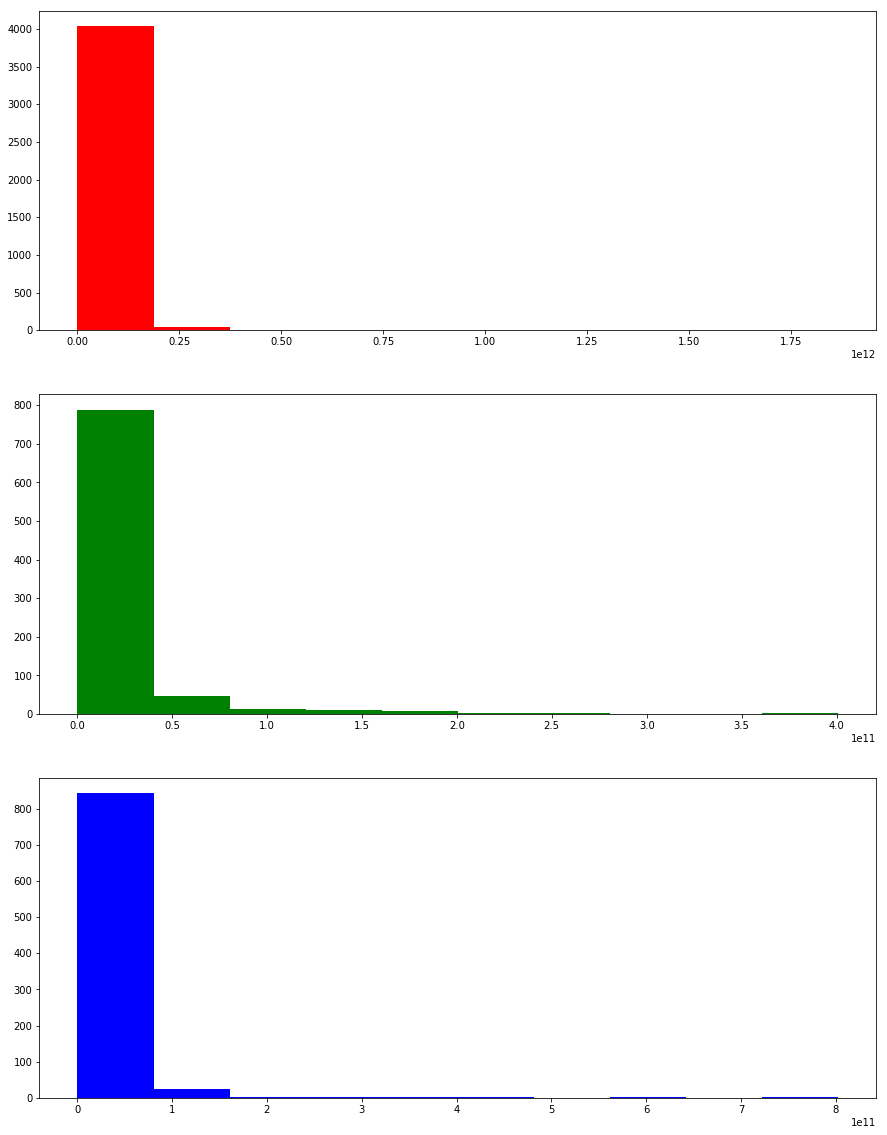

In [172]:
test_Mstars2 = (np.array(test_Mstars)*stdMstar+meanMstar)
train_Mstars2 = (np.array(train_Mstars)*stdMstar+meanMstar)
val_Mstars2 = (np.array(val_Mstars)*stdMstar+meanMstar)

#plt.plot(train_Mstars2, train_Mstars2, 'r.')
#plt.plot(val_Mstars2, val_Mstars2, 'g.')
#plt.plot(test_Mstars2, test_Mstars2, 'b.')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,20))

ax1.hist(train_Mstars2, color='r')
ax2.hist(val_Mstars2, color='g')
ax3.hist(test_Mstars2, color='b')

#ax1.set_xlim(8, 13)
#ax2.set_xlim(8, 13)
#ax3.set_xlim(8, 13)
#ax1.set_xscale('log')
#ax2.set_xscale('log')
#ax3.set_xscale('log')
#plt.xlabel('Actual $M_\star$')
#plt.ylabel('Predicted $M_\star$')
#plt.xlim(5e7, 1e12)
#plt.ylim(5e7, 1e12)
#plt.plot([1e6, 1e12], [1e6, 1e12], 'k:')
#plt.savefig('eagle.png')


In [89]:
print np.shape(train_inputs_x[0])

(150, 150, 1)


In [59]:
#model.set_weights(weights)
#opt_Mstars = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.001)
#opt = keras.optimizers.SGD(lr=1e-5, momentum=0.9)#
#opt = keras.optimizers.RMSprop(lr=1e-3, rho=0.9, epsilon=None)#, decay=0.001)
opt = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt,loss='mse')#, loss_weights={'Mstar': 0.2, 'Mhalf': 0.8})
#history = model.fit([train_inputs_x, train_inputs_z], [train_Mstars],\
#                        epochs=40, batch_size=32,\
#                        validation_data=([val_inputs_x, val_inputs_z], [val_Mstars]))
history = model.fit(np.array(train_inputs_x), np.array(train_Mstars),\
                        epochs=20, batch_size=16,\
                        validation_data=(np.array(val_inputs_x), np.array(val_Mstars)))

Train on 4095 samples, validate on 877 samples
Epoch 1/20
4095/4095 [==============================] - 79s 19ms/step - loss: 1.0655 - val_loss: 1.0742
Epoch 2/20
4095/4095 [==============================] - 72s 18ms/step - loss: 1.0209 - val_loss: 1.0742
Epoch 3/20
4095/4095 [==============================] - 74s 18ms/step - loss: 1.0209 - val_loss: 1.0742
Epoch 4/20
4095/4095 [==============================] - 73s 18ms/step - loss: 1.0209 - val_loss: 1.0742
Epoch 5/20
4095/4095 [==============================] - 72s 18ms/step - loss: 1.0209 - val_loss: 1.0742
Epoch 6/20
4095/4095 [==============================] - 79s 19ms/step - loss: 1.0209 - val_loss: 1.0742
Epoch 7/20
4080/4095 [============================>.] - ETA: 0s - loss: 1.0192

KeyboardInterrupt: 

In [259]:
weights_1 = model.get_weights()
history2 = model.fit(np.array(train_inputs_x), np.array(train_Mstars),\
                        epochs=350, batch_size=64,\
                        validation_data=(np.array(val_inputs_x), np.array(val_Mstars)))

Train on 4095 samples, validate on 877 samples
Epoch 1/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1302 - val_loss: 0.3038
Epoch 2/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1523 - val_loss: 0.5165
Epoch 3/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1810 - val_loss: 0.2648
Epoch 4/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1449 - val_loss: 0.3820
Epoch 5/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1324 - val_loss: 0.3382
Epoch 6/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1168 - val_loss: 0.3173
Epoch 7/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1210 - val_loss: 0.3044
Epoch 8/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1182 - val_loss: 0.2869
Epoch 9/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.1199 - val_loss: 0.2790

4095/4095 [==============================] - 114s 28ms/step - loss: 0.0490 - val_loss: 0.3022
Epoch 154/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0500 - val_loss: 0.3420
Epoch 155/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0508 - val_loss: 0.5180
Epoch 156/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0471 - val_loss: 0.2460
Epoch 157/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0477 - val_loss: 0.3570
Epoch 158/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0436 - val_loss: 0.2731
Epoch 159/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0452 - val_loss: 0.3034
Epoch 160/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0509 - val_loss: 0.3247
Epoch 161/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0451 - val_loss: 0.3499
Epoch 162/350
4095/4095 [=================

Epoch 229/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0428 - val_loss: 0.2901
Epoch 230/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0429 - val_loss: 0.2700
Epoch 231/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0443 - val_loss: 0.3166
Epoch 232/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0432 - val_loss: 0.2565
Epoch 233/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0421 - val_loss: 0.3009
Epoch 234/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0432 - val_loss: 0.3544
Epoch 235/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0439 - val_loss: 0.3940
Epoch 236/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0512 - val_loss: 0.2925
Epoch 237/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0494 - val_loss: 0.2320
Epoch 238/350
4095/4095 [===

Epoch 305/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0404 - val_loss: 0.4077
Epoch 306/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0421 - val_loss: 0.3211
Epoch 307/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0405 - val_loss: 0.3394
Epoch 308/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0394 - val_loss: 0.3068
Epoch 309/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0408 - val_loss: 0.2933
Epoch 310/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0434 - val_loss: 0.3412
Epoch 311/350
4095/4095 [==============================] - 114s 28ms/step - loss: 0.0417 - val_loss: 0.2930
Epoch 312/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0453 - val_loss: 0.2730
Epoch 313/350
4095/4095 [==============================] - 113s 28ms/step - loss: 0.0452 - val_loss: 0.4222
Epoch 314/350
4095/4095 [===

In [73]:
weights_1 = model.get_weights()

'''
history2 = model.fit([train_inputs_x, train_inputs_z], [train_Mstars],\
                        epochs=100, batch_size=32,\
                        validation_data=([val_inputs_x, val_inputs_z], [val_Mstars]))
weights_2 = model.get_weights()
print "2nd part done"

opt = keras.optimizers.SGD(lr=1e-5, momentum=0.9)#
model.compile(optimizer=opt,loss='mse')
history3 = model.fit([train_inputs_x, train_inputs_z], [train_Mstars],\
                        epochs=100, batch_size=32,\
                        validation_data=([val_inputs_x, val_inputs_z], [val_Mstars]))
weights_3 = model.get_weights()
print "3rd part done"

history4 = model.fit([train_inputs_x, train_inputs_z], [train_Mstars],\
                        epochs=100, batch_size=32,\
                        validation_data=([val_inputs_x, val_inputs_z], [val_Mstars]))
weights_4 = model.get_weights()
print "4th part done"
'''
opt = keras.optimizers.SGD(lr=5e-5, momentum=0.9)#
model.compile(optimizer=opt,loss='mse')
history5 = model.fit([train_inputs_x, train_inputs_z], [train_Mstars],\
                        epochs=120, batch_size=32,\
                        validation_data=([val_inputs_x, val_inputs_z], [val_Mstars]))
weights_5 = model.get_weights()
#print "5th part done"


Train on 4095 samples, validate on 877 samples
Epoch 1/120
4095/4095 [==============================] - 476s 116ms/step - loss: 0.2734 - val_loss: 0.2370
Epoch 2/120
4095/4095 [==============================] - 471s 115ms/step - loss: 0.2637 - val_loss: 0.2222
Epoch 3/120
4095/4095 [==============================] - 526s 128ms/step - loss: 0.2650 - val_loss: 0.2196
Epoch 4/120
4095/4095 [==============================] - 589s 144ms/step - loss: 0.2624 - val_loss: 0.2052
Epoch 5/120
4095/4095 [==============================] - 475s 116ms/step - loss: 0.2643 - val_loss: 0.2002
Epoch 6/120
4095/4095 [==============================] - 592s 145ms/step - loss: 0.2516 - val_loss: 0.2432
Epoch 7/120
4095/4095 [==============================] - 584s 143ms/step - loss: 0.2638 - val_loss: 0.2021
Epoch 8/120
2016/4095 [=============>................] - ETA: 3:44 - loss: 0.2760

KeyboardInterrupt: 

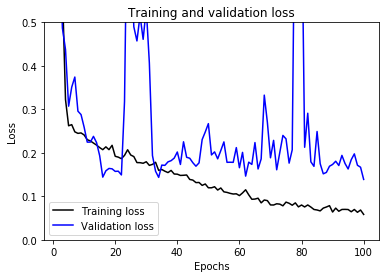

In [204]:
#loss_values = []
#val_loss_values = []
#for hist in [history, history2, history3, history4, history5]:
history_dict = history.history
#print history_dict

loss_values = history_dict['loss'][1:]
val_loss_values = history_dict['val_loss'][1:]
#acc = history_dict['accuracy']
epochs = range(2, len(loss_values) + 2)
plt.plot(epochs, loss_values, 'k-', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.legend()
plt.show()


In [11]:
#model.evaluate([test_inputs_x, test_inputs_z], [test_Mstars])
print 'Train:'
print model.evaluate(np.array(train_inputs_x), np.array(train_Mstars))
print 'Validation:' 
print model.evaluate(np.array(val_inputs_x), np.array(val_Mstars))
print 'Test:'
print model.evaluate(np.array(test_inputs_x), np.array(test_Mstars))

Train:
500/500 [==============================] - 5s 11ms/step
0.99341925573349
Validation:
100/100 [==============================] - 1s 11ms/step
0.8574600934982299
Test:
5251/5251 [==============================] - 57s 11ms/step
1.0259435004766635


In [6]:
Wsave3 = model.get_weights()
#print np.array(Wsave)-np.array(Wsave2)
#print Wsave3
#print '\n\n\n'
#rint Wsave2

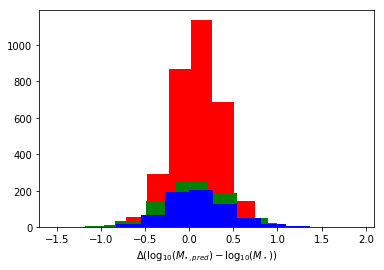

In [147]:
diffs_test = model.predict([test_inputs_x, test_inputs_z])[:,0] - test_Mstars
#for predicted, actual in zip(model.predict([test_inputs_x, test_inputs_z]), test_Mstars):
    #diff = (10**(predicted[0]*stdMstar+meanMstar))/(10**(actual*stdMstar+meanMstar))
    #diffs_test.append(predicted[0]-actual)
    #print predicted[0]*stdMstar+meanMstar, actual*stdMstar+meanMstar, diff
    
diffs_train = model.predict([train_inputs_x, train_inputs_z])[:,0] - train_Mstars
#for predicted, actual in zip(model.predict([train_inputs_x, train_inputs_z]), train_Mstars):
    #diff = (10**(predicted[0]*stdMstar+meanMstar))/(10**(actual*stdMstar+meanMstar))
    #diffs_train.append(predicted[0]-actual)
    
diffs_val = model.predict([val_inputs_x, val_inputs_z])[:,0] - val_Mstars
#for predicted, actual in zip(model.predict([val_inputs_x, val_inputs_z]), val_Mstars):
    #diff = (10**(predicted[0]*stdMstar+meanMstar))/(10**(actual*stdMstar+meanMstar))
    #diffs_val.append(predicted[0]-actual)
    
plt.hist(diffs_train, color='r')
plt.hist(diffs_val, color='g')
plt.hist(diffs_test, color='b')

plt.xlabel('$\Delta(\log_{10}(M_{\star, pred})-\log_{10}(M_\star))$')
plt.show()

In [129]:
print np.array(diffs_train).mean(), np.median(np.array(diffs_train))
print np.array(diffs_val).mean(), np.median(np.array(diffs_val))
print np.array(diffs_test).mean(), np.median(np.array(diffs_test))

-0.029108401 -0.03057599
-0.054403033 -0.046964094
-0.024399534 -0.056753755


In [15]:
#diffs_test = []
#for predicted, actual in zip(model.predict([test_inputs_x, test_inputs_z]), test_Mstars):
    #diff = (10**(predicted[0]*stdMstar+meanMstar))/(10**(actual*stdMstar+meanMstar))
    #diffs_test.append(predicted[0]-actual)
    #print predicted[0]*stdMstar+meanMstar, actual*stdMstar+meanMstar, diff
#print model.predict([test_inputs_x, test_inputs_z])[1]
model.predict([test_inputs_x, test_inputs_z])[:,0]

array([-1.0523199 , -0.01855231, -0.513489  ,  0.2368558 , -0.73161423,
        0.49114856, -0.69976634, -1.0396261 , -0.49404588,  0.19312622,
       -1.1131585 , -0.13845259, -0.60128915,  0.42510894, -1.1984667 ,
       -0.90848625, -0.4842964 , -0.95357144,  0.6661351 ,  0.3705828 ,
       -0.90307564, -0.8829482 , -1.0736524 , -1.2219539 , -0.84812105,
       -0.841681  , -0.06592741,  0.30150017,  0.10276046,  0.53112113,
       -0.8349639 , -0.11323038,  0.33174518, -1.2731318 , -0.9039602 ,
       -0.95329297, -1.1620054 , -0.6161963 , -0.96082914,  0.68358886,
        0.16240638,  0.2522969 , -1.0266869 ,  0.5123253 , -0.49776912,
       -0.415112  , -1.2264342 , -0.10760655, -0.5490683 , -1.1471187 ,
       -1.1765585 , -0.09457898, -1.1168044 , -0.56097543, -1.1954987 ,
        0.5774871 , -1.1690398 , -1.1082741 ,  0.14124908,  0.45781597,
        0.38034016, -0.39192858, -0.332068  , -0.85761124,  0.01828888,
       -0.8971089 , -0.80820763,  0.0510703 , -0.9543288 , -0.88

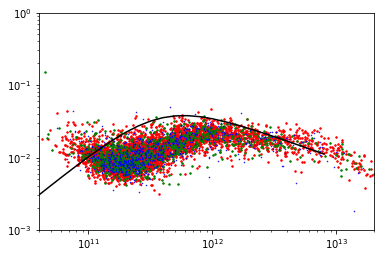

In [37]:
plt.cla()
plt.xscale('log')
plt.yscale('log')


test_Mstars_pred = 10**(model.predict([test_inputs_x, test_inputs_z])*stdMstar+meanMstar)[:,0]
train_Mstars_pred = 10**(model.predict([train_inputs_x, train_inputs_z])*stdMstar+meanMstar)[:,0]
val_Mstars_pred = 10**(model.predict([val_inputs_x, val_inputs_z])*stdMstar+meanMstar)[:,0]

test_Mstars2 = 10**(np.array(test_Mstars)*stdMstar+meanMstar)
train_Mstars2 = 10**(np.array(train_Mstars)*stdMstar+meanMstar)
val_Mstars2 = 10**(np.array(val_Mstars)*stdMstar+meanMstar)


plt.plot(train_Mdms, train_Mstars_pred/train_Mdms, 'r.', markersize=3)
#plt.plot(train_Mdms, 10**(np.array(train_Mstars)*stdMstar+meanMstar)/train_Mdms, 'r.', markersize=1.5)

#plt.plot(val_Mdms, 10**(np.array(val_Mstars)*stdMstar+meanMstar)/val_Mdms, 'r.', markersize=3)

plt.plot(val_Mdms, val_Mstars_pred/val_Mdms, 'g.', markersize=3)
plt.plot(test_Mdms, test_Mstars_pred/test_Mdms, 'b.', markersize=1)


#plt.plot(test_Mdms, test_Mstars2/test_Mdms, 'r.')

Mhs = np.array([10**h for h in np.arange(9., 13., 0.1)])

plt.plot(Mhs, moster2013(Mhs), 'k-')#, label='Moster+ 2013', linewidth=3)

plt.xlim(4e10, 2e13)
plt.ylim(1e-3, 1)
plt.show()

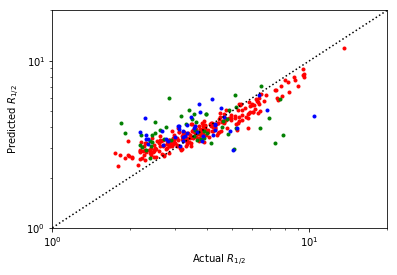

In [58]:
test_Mhalfs_pred = (model.predict([test_inputs_x, test_inputs_z])[1]*stdMhalf+meanMhalf)#[:,0]
train_Mhalfs_pred = (model.predict([train_inputs_x, train_inputs_z])[1]*stdMhalf+meanMhalf)#[:,0]
val_Mhalfs_pred = (model.predict([val_inputs_x, val_inputs_z])[1]*stdMhalf+meanMhalf)#[:,0]

test_Mhalfs2 = np.array(test_Mhalfs)*stdMhalf + meanMhalf
train_Mhalfs2 = np.array(train_Mhalfs)*stdMhalf + meanMhalf
val_Mhalfs2 = np.array(val_Mhalfs)*stdMhalf + meanMhalf

plt.cla()
plt.plot(train_Mhalfs2, train_Mhalfs_pred, 'r.')
plt.plot(val_Mhalfs2, val_Mhalfs_pred, 'g.')
plt.plot(test_Mhalfs2, test_Mhalfs_pred, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual $R_{1/2}$')
plt.ylabel('Predicted $R_{1/2}$')
plt.xlim(1, 2e1)
plt.ylim(1, 2e1)
plt.plot([1e-2, 1e2], [1e-2, 1e2], 'k:')
plt.show()

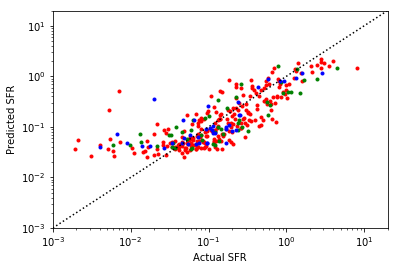

In [59]:
test_SFRs_pred = 10**(model.predict([test_inputs_x, test_inputs_z])[0]*stdSFR+meanSFR)[:,0]
train_SFRs_pred = 10**(model.predict([train_inputs_x, train_inputs_z])[0]*stdSFR+meanSFR)[:,0]
val_SFRs_pred = 10**(model.predict([val_inputs_x, val_inputs_z])[0]*stdSFR+meanSFR)[:,0]

test_SFRs2 = 10**(np.array(test_SFRs)*stdSFR+meanSFR)
train_SFRs2 = 10**(np.array(train_SFRs)*stdSFR+meanSFR)
val_SFRs2 = 10**(np.array(val_SFRs)*stdSFR+meanSFR)

plt.plot(train_SFRs2, train_SFRs_pred, 'r.')
plt.plot(val_SFRs2, val_SFRs_pred, 'g.')
plt.plot(test_SFRs2, test_SFRs_pred, 'b.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual SFR')
plt.ylabel('Predicted SFR')
plt.xlim(1e-3, 2e1)
plt.ylim(1e-3, 2e1)
plt.plot([1e-3, 1e2], [1e-3, 1e2], 'k:')
plt.show()

In [44]:
print model.predict([test_inputs_x, test_inputs_z])[:,0]

[-2.16436982e-01  5.53752482e-01  3.50329839e-03 -4.75315154e-01
 -2.22994179e-01 -2.46777803e-01 -1.06709152e-01 -3.03620011e-01
 -1.37618735e-01  3.22960258e-01 -3.10125649e-01 -3.40372324e-01
 -4.55779701e-01 -3.68227899e-01 -3.46398801e-02  4.31323171e-01
 -4.58491445e-01 -2.96306014e-01  4.06592458e-01  5.65453112e-01
 -3.84336233e-01  2.99527228e-01 -5.31313956e-01 -2.85377562e-01
 -4.05238390e-01 -4.62027222e-01 -2.64292568e-01 -4.78978097e-01
 -3.58334303e-01  4.25254226e-01  7.70469368e-01 -3.71607423e-01
 -4.11480635e-01 -3.60802352e-01 -2.89585590e-02 -3.17310512e-01
 -1.52564347e-01 -4.78948355e-01  9.88189131e-02 -2.65321225e-01
 -2.58625776e-01 -3.30926478e-01 -5.74630439e-01 -2.47196287e-01
  6.20886445e-01 -3.15121561e-02 -4.42036390e-01 -3.72957259e-01
 -4.91110206e-01 -1.56627983e-01 -1.45378694e-01  4.05982435e-02
 -1.38098359e-01 -4.37613487e-01  2.04474032e-01 -4.75809038e-01
  3.20501029e-01  9.12718028e-02 -2.01967880e-01  5.13747454e-01
 -3.64188939e-01 -5.17039

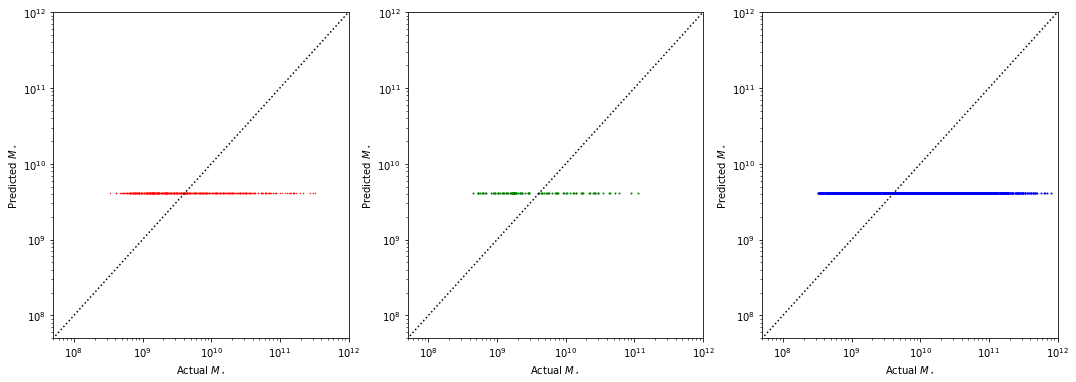

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))


#test_Mstars_pred = 10**(model.predict([test_inputs_x, test_inputs_z])*stdMstar+meanMstar)[:,0]
#train_Mstars_pred = 10**(model.predict([train_inputs_x, train_inputs_z])*stdMstar+meanMstar)[:,0]
#val_Mstars_pred = 10**(model.predict([val_inputs_x, val_inputs_z])*stdMstar+meanMstar)[:,0]
test_Mstars_pred = 10**(model.predict(np.array(test_inputs_x))*stdMstar+meanMstar)[:,0]
train_Mstars_pred = 10**(model.predict(np.array(train_inputs_x))*stdMstar+meanMstar)[:,0]
val_Mstars_pred = 10**(model.predict(np.array(val_inputs_x))*stdMstar+meanMstar)[:,0]

test_Mstars2 = 10**(np.array(test_Mstars)*stdMstar+meanMstar)
train_Mstars2 = 10**(np.array(train_Mstars)*stdMstar+meanMstar)
val_Mstars2 = 10**(np.array(val_Mstars)*stdMstar+meanMstar)

ax1.plot(train_Mstars2, train_Mstars_pred, 'r.', markersize=1)

ax2.plot(val_Mstars2, val_Mstars_pred, 'g.', markersize=2)
ax3.plot(test_Mstars2, test_Mstars_pred, 'b.', markersize=2)

for ax in (ax1, ax2, ax3):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Actual $M_\star$')
    ax.set_ylabel('Predicted $M_\star$')
    ax.set_xlim(5e7, 1e12)
    ax.set_ylim(5e7, 1e12)
    ax.plot([1e6, 1e12], [1e6, 1e12], 'k:')
#plt.plot([-3, 3], [-3, 3], 'k:')
#plt.savefig('eagle.png')

In [227]:
pr = model.predict(np.array(test_inputs_x))
print min(pr), max(pr)

[0.06191976] [0.06191976]


In [26]:
print model.predict([train_inputs_x, train_inputs_z])

[[0.02371776]
 [0.02232142]
 [0.02278223]
 [0.02253697]
 [0.02300666]
 [0.02333315]
 [0.02251312]
 [0.02279157]
 [0.02246662]
 [0.02220097]
 [0.02231702]
 [0.02331804]
 [0.02217599]
 [0.02288258]
 [0.02405975]
 [0.02393761]
 [0.02293677]
 [0.02238274]
 [0.02564149]
 [0.02234989]
 [0.02265893]
 [0.02336954]
 [0.02236214]
 [0.02345657]
 [0.02264213]
 [0.02245059]
 [0.02253964]
 [0.02235637]
 [0.02272314]
 [0.02412626]
 [0.02295634]
 [0.0225218 ]
 [0.02327738]
 [0.02249577]
 [0.02279595]
 [0.02260405]
 [0.02269865]
 [0.02367775]
 [0.0224183 ]
 [0.02326579]
 [0.02215463]
 [0.02295658]
 [0.02232303]
 [0.02275258]
 [0.02373873]
 [0.02230358]
 [0.02236714]
 [0.02285096]
 [0.02237037]
 [0.02339577]
 [0.02226811]
 [0.02228232]
 [0.02231634]
 [0.02250054]
 [0.02232797]
 [0.02251054]
 [0.02433958]
 [0.02276653]
 [0.02296282]
 [0.02284153]
 [0.0225066 ]
 [0.02218232]
 [0.02456864]
 [0.02227427]
 [0.02237772]
 [0.02260541]
 [0.0223406 ]
 [0.02665252]
 [0.02262015]
 [0.02224004]
 [0.02353663]
 [0.02

In [66]:
model.save('DecentModel_04022019_Loss_0.20.hdf5')

In [27]:
def moster2013(M_h):
	'''
	Moster et al. 2013 stellar mass - halo mass relation at z=0
	Input:
	  -M_h: numpy array of halo masses
	Returns:
	  Corresponding Mstar/Mhalo values
	'''
	M1 = 10**(11.59)
	N = 0.0351
	beta = 1.376
	gamma = 0.608

	mStarmHalo = 2*N*((M_h/M1)**(-1*beta)+(M_h/M1)**gamma)**-1

	return mStarmHalo

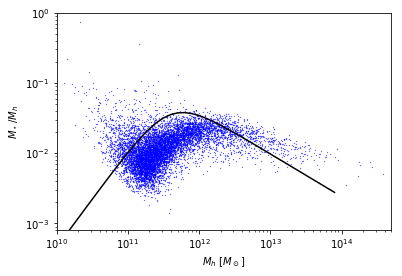

In [30]:
MDM = myData['MDM']
MStar = 10**myData['Mstar']
plt.plot(MDM, MStar/MDM, 'b.', markersize=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e10, 5e14)
plt.ylim(8e-4, 1)
#plt.ylim(5e7, 3e12)
plt.xlabel('$M_h\ [M_\odot]$')
plt.ylabel('$M_\star/M_h$')
Mhs = np.array([10**h for h in np.arange(9., 14., 0.1)])

plt.plot(Mhs, moster2013(Mhs), 'k-')#, label='Moster+ 2013', linewidth=3)

In [12]:
model.load_weights('testModelWeirdStuff.hdf5')
weights = model.get_weights()

In [19]:
print np.array(weights) 

[array([[[[ 0.008767  , -0.04950262, -0.09953298,  0.06211951,
          -0.10251968,  0.03552216,  0.03091692, -0.06468198,
          -0.01243969,  0.0281544 ,  0.10243097,  0.22656932,
          -0.0571684 , -0.00295371, -0.18287057,  0.05149212,
           0.04608106, -0.00052752, -0.01674258, -0.21970928,
           0.14200427,  0.07357611, -0.13548456, -0.01760051,
           0.23392622,  0.03789632, -0.03543739,  0.23475438,
           0.1468966 ,  0.04699809, -0.11266491, -0.29252428]],

        [[-0.00510826, -0.03005239, -0.05476237,  0.06490381,
          -0.00435937,  0.00467258,  0.0280025 ,  0.0324575 ,
          -0.10448982, -0.09618533, -0.10419136,  0.09299011,
           0.00699596, -0.09771864, -0.08075525, -0.14294069,
          -0.06425273, -0.04397091,  0.03913143, -0.03059174,
          -0.09069042, -0.01678279, -0.06941831, -0.02541163,
           0.09960479,  0.10557218,  0.02621116,  0.14616348,
          -0.14216381,  0.02809368,  0.09037951,  0.03725431]],

 